# Breast Cancer classification using ANN

In [1]:
#!pip install tensorflow

In [2]:
#!pip install keras

In [3]:
#!pip install pandas

In [4]:
#!pip install numpy
#!pip install -U scikit-learn

In [5]:
#!pip install matplotlib

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [7]:
#load the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [8]:
#loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

#print the first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
#adding the 'target' column to the dataframe
data_frame['label'] = breast_cancer_dataset.target

In [10]:
#checking for missing values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [11]:
x = data_frame.drop(columns = 'label', axis = 1)
y = data_frame['label']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_std = scaler.fit_transform(x_train)

x_test_std = scaler.transform(x_test)

# Build ANN Model

In [14]:
#!pip install chardet

In [19]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [20]:
#setting up the layers of neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (30,)),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid')
])

In [21]:
#compiling the Neural Network

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [22]:
#training the Neural Network

history = model.fit(x_train_std, y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
13/13 [==============================] - 1s 14ms/step - loss: 0.4909 - accuracy: 0.7335 - val_loss: 0.4355 - val_accuracy: 0.7826
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3599 - accuracy: 0.8313 - val_loss: 0.3367 - val_accuracy: 0.8478
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2885 - accuracy: 0.8875 - val_loss: 0.2826 - val_accuracy: 0.8696
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2493 - accuracy: 0.9046 - val_loss: 0.2477 - val_accuracy: 0.9130
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2206 - accuracy: 0.9242 - val_loss: 0.2224 - val_accuracy: 0.9348
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1987 - accuracy: 0.9438 - val_loss: 0.2032 - val_accuracy: 0.9348
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.1812 - accuracy: 0.9462 - val_loss: 0.1877 - val_accuracy: 0.9348
Epoch 8/10
13/13 [=


# Visualization

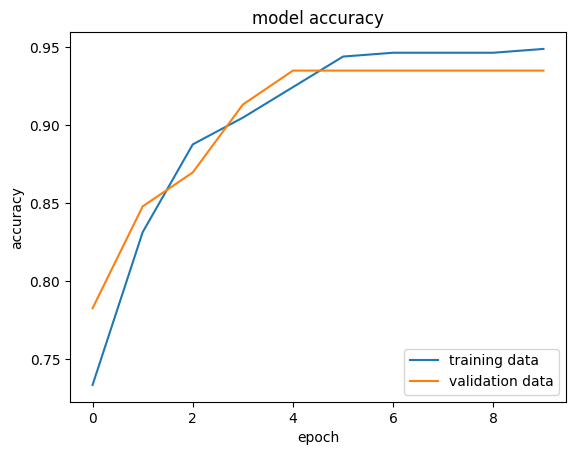

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data','validation data'],loc = 'lower right')

# Prediction

In [26]:
loss, accuracy = model.evaluate(x_test_std, y_test)
print(accuracy)

4/4 [==============================] - 0s 2ms/step - loss: 0.1471 - accuracy: 0.9561
0.9561403393745422


In [27]:
y_pred = model.predict(x_test_std)

4/4 [==============================] - 0s 5ms/step
